# Simple Linear Regression Demonstration

This notebook demonstrates how to perform a simple linear regression on the Breast Cancer Wisconsin dataset using the scikit-learn library.

## Import Required Libraries

Import the necessary libraries including matplotlib, pandas, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

## Load and Prepare Dataset

Load the Breast Cancer Wisconsin dataset and prepare it for analysis.

In [2]:
# pylint: disable=E1101
# Load the dataset.
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
# pylint: enable=E1101

## Find Most Correlated Features

Compute the correlation matrix and identify the two most correlated features.

In [3]:
# Compute the correlation matrix.
corr_matrix = df.corr()

# Find the two most correlated variables.
corr_target = corr_matrix["target"].drop("target")
most_correlated = corr_target.abs().sort_values(ascending=False).index[:2]

# Extract the most correlated features.
X = df[most_correlated[0]].values.reshape(-1, 1)
y = df[most_correlated[1]].values

## Split Data and Train Model

Split the data into training and testing sets, then train the linear regression model.

In [4]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Visualize Results

Create a visualization showing the training data, test data, regression line, and residuals.

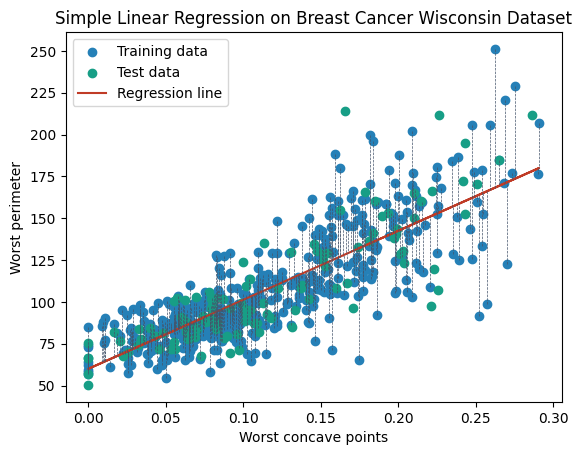

In [5]:
# Plot the training and test data.
plt.scatter(X_train, y_train, color="#2580B7", label="Training data")
plt.scatter(X_test, y_test, color="#179E86", label="Test data")

# Plot the regression line.
plt.plot(X_train, y_train_pred, color="#C03B26", label="Regression line")

# Plot the residuals.
for x0, y1, y2 in zip(X_train, y_train, y_train_pred):
    plt.plot([x0, x0], [y1, y2], color="#44546A", linestyle="--", linewidth=0.5)

# Add labels and legend.
plt.xlabel(most_correlated[0].capitalize())
plt.ylabel(most_correlated[1].capitalize())
plt.legend()
plt.title("Simple Linear Regression on Breast Cancer Wisconsin Dataset")

# Show the plot.
plt.show()

## Evaluate Model Performance

Calculate and display the Root Mean Squared Error for both training and test sets.

In [6]:
# Print the mean squared error.
print(f"Root Mean Squared Error (Train): {
    root_mean_squared_error(y_train, y_train_pred)
}")
print(f"Root Mean Squared Error (Test): {
    root_mean_squared_error(y_test, y_test_pred)
}")

Root Mean Squared Error (Train): 19.66993150131582
Root Mean Squared Error (Test): 18.2525066430829
